###  1、对目标函数进行优化
目标函数：
 

In [9]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

Jacbion矩阵

In [2]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

Hessian矩阵

In [3]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

H*p的矩阵

In [4]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [5]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


array([1., 1., 1., 1., 1.])

In [6]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([1.00000004, 1.0000001 , 1.00000021, 1.00000044, 1.00000092])

In [7]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

In [8]:
bnds = [(-1, 1), (0, 1), (1, 2), (2, 3), (2,3)]
cons = [{'type': 'ineq',
         'fun': lambda x: 20 - np.max(x)},
        {'type': 'ineq',
         'fun': lambda x: x[0] ** 2 - 1},
        {'type': 'eq',
         'fun': lambda x: sum(x) - 8}]


x0 = np.array([1.5, 10, 2, 1,1])

res = minimize(rosen, x0, method='SLSQP', jac=rosen_der, hess=rosen_hess, constraints=cons,tol=1e-8,options={'maxiter': 100, 'disp': True})
res.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5721259316964836
            Iterations: 24
            Function evaluations: 40
            Gradient evaluations: 24


/Users/zhy/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:505: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  RuntimeWarning)


array([1.06715431, 1.13836014, 1.29554771, 1.67882844, 2.8201094 ])

### 2、常微分方程求解

Eq(f(x), -C1/(C1 - exp(x)))
{1/2}


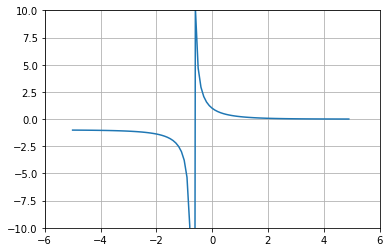

In [12]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
print(dsolve(eq, f(x)))
C1 = symbols('C1')
eqr = -C1/(C1 - exp(x))
eqr1 = eqr.subs(x, 0)
print(solveset(eqr1 - 1, C1))
eqr2 = eqr.subs(C1, 1/2)
# 画图
import matplotlib.pyplot as plt
import numpy as np
x_1 = np.arange(-5, 5, 0.1)
y_1 = [-0.5/(0.5 - exp(x)) for x in x_1]
plt.plot(x_1, y_1)
plt.axis([-6,6,-10,10])
plt.grid()
plt.show()